Approximate Gaussian Processes
==============================

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

**Abstract**: null

$$
\newcommand{\tk}[1]{}
\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)}
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{ \ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{\mathbf{Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{\mathbf{Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{\mathbf{Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{\mathbf{Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{ \basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{ \Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{ \basisFunction}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{ \Phi}}
\newcommand{\activationScalar}{\basisFunction}
\newcommand{\activationVector}{\boldsymbol{ \basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{ \Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{ \MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{ \Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{B}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{ \coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{ \covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceMatrixTwo}{\boldsymbol{ \Sigma}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{ \croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{ \MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{ \dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{ \MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{ \degreeScalar}}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{ \MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{ \distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{ \lambda}}
\newcommand{\eigenvector}{\mathbf{ \eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{U}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{ \MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{ \fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\uniformDist}[3]{\mathcal{U}\left(#1|#2,#3\right)}
\newcommand{\uniformSamp}[2]{\mathcal{U}\left(#1,#2\right)}
\newcommand{\given}{|}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{ \MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{ \hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{ \inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{Z}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{ \inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{U}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVals}{\inputVector}
\newcommand{\inputVector}{\mathbf{ \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{ \kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{ \MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{ \laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{ \ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{ \Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{ \delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{ \latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{ \MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{z}
\newcommand{\latentVector}{\mathbf{ \latentScalar}}
\newcommand{\latentMatrix}{\mathbf{Z}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{ \locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{ \mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{ \mappingFunction}}
\newcommand{\scaleScalar}{s}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{ \mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{ \mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{M}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{ \meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{ \meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{ E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{ \epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{ \ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n}
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m}
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{ \theta}}
\newcommand{\parameterMatrix}{\boldsymbol{ \Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{ \parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{ \precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{J}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{ \pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{ \widetilde{Y}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{ \rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{R}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{ \sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{s}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\trace}[1]{\text{tr}\left(#1\right)}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{ \kappa}}
\newcommand{\springMatrix}{\boldsymbol{ \mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{\mathbf{ \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{ \sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{G}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{ \switchScalar}}
\newcommand{\switchMatrix}{\mathbf{S}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)}
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{ \weightScalar}}
\newcommand{\weightMatrix}{\mathbf{W}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{A}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{ \weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}}
\newcommand{\zerosVector}{\mathbf{0}}
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/sparse-gps.jpg" style="width:45%">

Figure: <i>In recent years, approximations for Gaussian process models
haven’t been the most fashionable approach to machine learning. Image
credit: Kai Arulkumaran</i>

Inference in a Gaussian process has computational complexity of
$\mathcal{O}(n^3)$ and storage demands of $\mathcal{O}(n^2)$. This is
too large for many modern data sets.

Low rank approximations allow us to work with Gaussian processes with
computational complexity of $\mathcal{O}(nm^2)$ and storage demands of
$\mathcal{O}(nm)$, where $m$ is a user chosen parameter.

In machine learning, low rank approximations date back to Smola and
Bartlett (n.d.), Williams and Seeger (n.d.), who considered the Nyström
approximation and Csató and Opper (2002);Csató (2002) who considered low
rank approximations in the context of on-line learning. Selection of
active points for the approximation was considered by Seeger et al.
(n.d.) and Snelson and Ghahramani (n.d.) first proposed that the active
set could be optimized directly. Those approaches were reviewed by
Quiñonero Candela and Rasmussen (2005) under a unifying likelihood
approximation perspective. General rules for deriving the maximum
likelihood for these sparse approximations were given in Lawrence
(n.d.).

Modern variational interpretations of these low rank approaches were
first explored in Titsias (n.d.). A more modern summary which considers
each of these approximations as an $\alpha$-divergence is given by Bui
et al. (2017).

Variational Compression
-----------------------

Inducing variables are a compression of the real observations. The basic
idea is can I create a new data set that summarizes all the information
in the original data set. If this data set is smaller, I’ve compressed
the information in the original data set.

Inducing variables can be thought of as pseudo-data, indeed in Snelson
and Ghahramani (n.d.) they were referred to as *pseudo-points*.

The only requirement for inducing variables is that they are jointly
distributed as a Gaussian process with the original data. This means
that they can be from the space $\mathbf{ f}$ or a space that is related
through a linear operator (see e.g. Álvarez et al. (2010)). For example
we could choose to store the gradient of the function at particular
points or a value from the frequency spectrum of the function
(Lázaro-Gredilla et al., 2010).

Variational Compression II
--------------------------

Inducing variables don’t only allow for the compression of the
non-parameteric information into a reduced data aset but they also allow
for computational scaling of the algorithms through, for example
stochastic variational approaches Hensman et al. (n.d.) or
parallelization Gal et al. (n.d.),Dai et al. (2014), Seeger et al.
(2017).

We’ve seen how we go from parametric to non-parametric. The limit
implies infinite dimensional $\mathbf{ w}$. Gaussian processes are
generally non-parametric: combine data with covariance function to get
model. This representation *cannot* be summarized by a parameter vector
of a fixed size.

Parametric models have a representation that does not respond to
increasing training set size. Bayesian posterior distributions over
parameters contain the information about the training data, for example
if we use use Bayes’ rule from training data, $$
p\left(\mathbf{ w}|\mathbf{ y}, \mathbf{X}\right),
$$ to make predictions on test data $$
p\left(y_*|\mathbf{X}_*, \mathbf{ y}, \mathbf{X}\right) = \int
              p\left(y_*|\mathbf{ w},\mathbf{X}_*\right)p\left(\mathbf{ w}|\mathbf{ y},
                \mathbf{X})\text{d}\mathbf{ w}\right)
$$ then $\mathbf{ w}$ becomes a bottleneck for information about the
training set to pass to the test set. The solution is to increase $m$ so
that the bottleneck is so large that it no longer presents a problem.
How big is big enough for $m$? Non-parametrics says
$m\rightarrow \infty$.

Now no longer possible to manipulate the model through the standard
parametric form. However, it *is* possible to express *parametric* as
GPs: $$
k\left(\mathbf{ x}_i,\mathbf{ x}_j\right)=\phi_:\left(\mathbf{ x}_i\right)^\top\phi_:\left(\mathbf{ x}_j\right).
$$ These are known as degenerate covariance matrices. Their rank is at
most $m$, non-parametric models have full rank covariance matrices. Most
well known is the “linear kernel”, $$
k(\mathbf{ x}_i, \mathbf{ x}_j) = \mathbf{ x}_i^\top\mathbf{ x}_j.
$$ For non-parametrics prediction at a new point, $\mathbf{ f}_*$, is
made by conditioning on $\mathbf{ f}$ in the joint distribution. In GPs
this involves combining the training data with the covariance function
and the mean function. Parametric is a special case when conditional
prediction can be summarized in a *fixed* number of parameters.
Complexity of parametric model remains fixed regardless of the size of
our training data set. For a non-parametric model the required number of
parameters grows with the size of the training data.

-   Everything we want to do with a GP involves marginalising
    $\mathbf{ f}$
    -   Predictions
    -   Marginal likelihood
    -   Estimating covariance parameters
-   The posterior of $\mathbf{ f}$ is the central object. This means
    inverting $\mathbf{K}_{\mathbf{ f}\mathbf{ f}}$.

<img class="negate" src="http://inverseprobability.com/talks/slides/../slides/diagrams/cov_approx.png" style="width:90%">

Figure: Figure originally from presentation by Ed Snelson at NIPS

The Nystr"om approximation takes the form, $$
\mathbf{K}_{\mathbf{ f}\mathbf{ f}}\approx \mathbf{Q}_{\mathbf{ f}\mathbf{ f}}= \mathbf{K}_{\mathbf{ f}\mathbf{ u}}\mathbf{K}_{\mathbf{ u}\mathbf{ u}}^{-1}\mathbf{K}_{\mathbf{ u}\mathbf{ f}}
$$ The idea is that instead of inverting
$\mathbf{K}_{\mathbf{ f}\mathbf{ f}}$, we make a low rank (or Nyström)
approximation, and invert $\mathbf{K}_{\mathbf{ u}\mathbf{ u}}$ instead.

In the original Nystr"om method the columns to incorporate are sampled
from the complete set of columns (without replacement). In a kernel
matrix each of these columns corresponds to a data point. In the
Nystr"om method these points are sometimes called *landmark* points.

<table>
<tr>
<td width="30%">

$$\mathbf{X},\,\mathbf{ y}$$

</td>
<td width="70%">

<img class="negate" src="http://inverseprobability.com/talks/slides/../slides/diagrams/nomenclature1.png" style="width:90%">

</td>
</tr>
</table>
<table>
<tr>
<td width="30%">

$$\mathbf{X},\,\mathbf{ y}$$
$${\color{blue} f(\mathbf{ x})} \sim {\mathcal GP}$$

</td>
<td width="70%">

<img class="negate" src="http://inverseprobability.com/talks/slides/../slides/diagrams/nomenclature2.png" style="width:90%">

</td>
</tr>
</table>
<table>
<tr>
<td width="30%">

$$\mathbf{X},\,\mathbf{ y}$$
$$f(\mathbf{ x}) \sim {\mathcal GP}$$$$p({\color{blue} \mathbf{ f}}) = \mathcal{N}\left(\mathbf{0},\mathbf{K}_{\mathbf{ f}\mathbf{ f}}\right)$$

</td>
<td width="70%">

<img class="negate" src="http://inverseprobability.com/talks/slides/../slides/diagrams/nomenclature3.png" style="width:90%">

</td>
</tr>
</table>
<table>
<tr>
<td width="30%">

$$
\mathbf{X},\,\mathbf{ y}$$ $$f(\mathbf{ x}) \sim {\mathcal GP}
$$ $$
p(\mathbf{ f}) = \mathcal{N}\left(\mathbf{0},\mathbf{K}_{\mathbf{ f}\mathbf{ f}}\right)
$$ $$p( \mathbf{ f}|\mathbf{ y},\mathbf{X})
$$

</td>
<td width="70%">

<img class="negate" src="http://inverseprobability.com/talks/slides/../slides/diagrams/nomenclature3a.png" style="width:90%">

</td>
</tr>
</table>

Take an extra $m$ points on the function, $\mathbf{ u}= f(\mathbf{Z})$.
$$p(\mathbf{ y},\mathbf{ f},\mathbf{ u}) = p(\mathbf{ y}|\mathbf{ f}) p(\mathbf{ f}|\mathbf{ u}) p(\mathbf{ u})$$

<img class="negate" src="http://inverseprobability.com/talks/slides/../slides/diagrams/cov_inducing_withX.png" style="width:60%">

Take and extra $M$ points on the function, $\mathbf{ u}= f(\mathbf{Z})$.
$$p(\mathbf{ y},\mathbf{ f},\mathbf{ u}) = p(\mathbf{ y}|\mathbf{ f}) p(\mathbf{ f}|\mathbf{ u}) p(\mathbf{ u})$$
$$\begin{aligned}
    p(\mathbf{ y}|\mathbf{ f}) &= \mathcal{N}\left(\mathbf{ y}|\mathbf{ f},\sigma^2 \mathbf{I}\right)\\
    p(\mathbf{ f}|\mathbf{ u}) &= \mathcal{N}\left(\mathbf{ f}| \mathbf{K}_{\mathbf{ f}\mathbf{ u}}\mathbf{K}_{\mathbf{ u}\mathbf{ u}}^{-1}\mathbf{ u}, \tilde{\mathbf{K}}\right)\\
    p(\mathbf{ u}) &= \mathcal{N}\left(\mathbf{ u}| \mathbf{0},\mathbf{K}_{\mathbf{ u}\mathbf{ u}}\right)
  \end{aligned}$$

<table>
<tr>
<td width="30%">

$$\mathbf{X},\,\mathbf{ y}$$ $$f(\mathbf{ x}) \sim {\mathcal GP}$$
$$p(\mathbf{ f}) = \mathcal{N}\left(\mathbf{0},\mathbf{K}_{\mathbf{ f}\mathbf{ f}}\right)$$
$$p(\mathbf{ f}|\mathbf{ y},\mathbf{X})$$

</td>
<td width="70%">

<img class="negate" src="http://inverseprobability.com/talks/slides/../slides/diagrams/nomenclature4" style="width:90%">

</td>
</tr>
</table>

$$
\begin{align}
                           &\qquad\mathbf{Z}, \mathbf{ u}\\                      &p({\color{red} \mathbf{ u}})  = \mathcal{N}\left(\mathbf{0},\mathbf{K}_{\mathbf{ u}\mathbf{ u}}\right)\end{align}
$$

<table>
<tr>
<td width="30%">

$$\mathbf{X},\,\mathbf{ y}$$ $$f(\mathbf{ x}) \sim {\mathcal GP}$$
$$p(\mathbf{ f}) = \mathcal{N}\left(\mathbf{0},\mathbf{K}_{\mathbf{ f}\mathbf{ f}}\right)$$
$$p(\mathbf{ f}|\mathbf{ y},\mathbf{X})$$
$$p(\mathbf{ u})  = \mathcal{N}\left(\mathbf{0},\mathbf{K}_{\mathbf{ u}\mathbf{ u}}\right)$$
$$\widetilde p({\color{red}\mathbf{ u}}|\mathbf{ y},\mathbf{X})$$

</td>
<td width="70%">

<img class="negate" src="http://inverseprobability.com/talks/slides/../slides/diagrams/nomenclature5.png" style="width:90%">

</td>
</tr>
</table>

Instead of doing $$
p(\mathbf{ f}|\mathbf{ y},\mathbf{X}) = \frac{p(\mathbf{ y}|\mathbf{ f})p(\mathbf{ f}|\mathbf{X})}{\int p(\mathbf{ y}|\mathbf{ f})p(\mathbf{ f}|\mathbf{X}){\text{d}\mathbf{ f}}}
$$ We’ll do $$
p(\mathbf{ u}|\mathbf{ y},\mathbf{Z}) = \frac{p(\mathbf{ y}|\mathbf{ u})p(\mathbf{ u}|\mathbf{Z})}{\int p(\mathbf{ y}|\mathbf{ u})p(\mathbf{ u}|\mathbf{Z}){\text{d}\mathbf{ u}}}
$$

<!--Flexible Parametric Approximation-->

-   Date back to {Williams and Seeger (n.d.); Smola and Bartlett (n.d.);
    Csató and Opper (2002); Seeger et al. (n.d.); Snelson and Ghahramani
    (n.d.)}. See {Quiñonero Candela and Rasmussen (2005); Bui et
    al. (2017)} for reviews.
-   We follow variational perspective of {Titsias (n.d.)}.
-   This is an augmented variable method, followed by a collapsed
    variational approximation {King and Lawrence (n.d.); Hensman et
    al. (2012)}.

<table>
<tr>
<td width="60%">
</td>
<td width="40%">
</td>
</tr>
</table>

Variational Bound on $p(\mathbf{ y}|\mathbf{ u})$
-------------------------------------------------

The conditional density of the data given the inducing points can be
*lower* bounded variationally $$
\begin{aligned}
    \log p(\mathbf{ y}|\mathbf{ u}) & = \log \int p(\mathbf{ y}|\mathbf{ f}) p(\mathbf{ f}|\mathbf{ u}) \text{d}\mathbf{ f}\\ & = \int q(\mathbf{ f}) \log \frac{p(\mathbf{ y}|\mathbf{ f}) p(\mathbf{ f}|\mathbf{ u})}{q(\mathbf{ f})}\text{d}\mathbf{ f}+ \text{KL}\left( q(\mathbf{ f})\,\|\,p(\mathbf{ f}|\mathbf{ y}, \mathbf{ u}) \right).
\end{aligned}
$$

The key innovation from Titsias (n.d.) was to then make a particular
choice for $q(\mathbf{ f})$. If we set
$q(\mathbf{ f})=p(\mathbf{ f}|\mathbf{ u})$, $$
  \log p(\mathbf{ y}|\mathbf{ u}) \geq \int p(\mathbf{ f}|\mathbf{ u}) \log p(\mathbf{ y}|\mathbf{ f})\text{d}\mathbf{ f}.
  $$ $$
  p(\mathbf{ y}|\mathbf{ u}) \geq \exp \int p(\mathbf{ f}|\mathbf{ u}) \log p(\mathbf{ y}|\mathbf{ f})\text{d}\mathbf{ f}.
  $$

Optimal Compression in Inducing Variables
-----------------------------------------

Maximizing the lower bound minimizes the Kullback-Leibler divergence (or
*information gain*) between our approximating density,
$p(\mathbf{ f}|\mathbf{ u})$ and the true posterior density,
$p(\mathbf{ f}|\mathbf{ y}, \mathbf{ u})$.

$$
  \text{KL}\left( p(\mathbf{ f}|\mathbf{ u})\,\|\,p(\mathbf{ f}|\mathbf{ y}, \mathbf{ u}) \right) = \int p(\mathbf{ f}|\mathbf{ u}) \log \frac{p(\mathbf{ f}|\mathbf{ u})}{p(\mathbf{ f}|\mathbf{ y}, \mathbf{ u})}\text{d}\mathbf{ u}
  $$

This bound is minimized when the information stored about $\mathbf{ y}$
is already stored in $\mathbf{ u}$. In other words, maximizing the bound
seeks an *optimal compression* from the *information gain* perspective.

For the case where $\mathbf{ u}= \mathbf{ f}$ the bound is exact
($\mathbf{ f}$ $d$-separates $\mathbf{ y}$ from $\mathbf{ u}$).

Choice of Inducing Variables
----------------------------

The quality of the resulting bound is determined by the choice of the
inducing variables. You are free to choose whichever heuristics you like
for the inducing variables, as long as they are drawn jointly from a
valid Gaussian process, i.e. such that $$
\begin{bmatrix}
\mathbf{ f}\\
\mathbf{ u}
\end{bmatrix} \sim \mathcal{N}\left(\mathbf{0},\mathbf{K}\right)
$$ where the kernel matrix itself can be decomposed into $$
\mathbf{K}=
\begin{bmatrix}
\mathbf{K}_{\mathbf{ f}\mathbf{ f}}& \mathbf{K}_{\mathbf{ f}\mathbf{ u}}\\
\mathbf{K}_{\mathbf{ u}\mathbf{ f}}& \mathbf{K}_{\mathbf{ u}\mathbf{ u}}
\end{bmatrix}
$$ Choosing the inducing variables amounts to specifying
$\mathbf{K}_{\mathbf{ f}\mathbf{ u}}$ and
$\mathbf{K}_{\mathbf{ u}\mathbf{ u}}$ such that $\mathbf{K}$ remains
positive definite. The typical choice is to choose $\mathbf{ u}$ in the
same domain as $\mathbf{ f}$, associating each inducing output, $u_i$
with a corresponding input location $\mathbf{ z}$. However, more
imaginative choices are absolutely possible. In particular, if
$\mathbf{ u}$ is related to $\mathbf{ f}$ through a linear operator (see
e.g. Álvarez et al. (2010)), then valid
$\mathbf{K}_{\mathbf{ u}\mathbf{ u}}$ and
$\mathbf{K}_{\mathbf{ u}\mathbf{ f}}$ can be constructed. For example we
could choose to store the gradient of the function at particular points
or a value from the frequency spectrum of the function (Lázaro-Gredilla
et al., 2010).

Variational Compression II
--------------------------

Inducing variables don’t only allow for the compression of the
non-parameteric information into a reduced data set but they also allow
for computational scaling of the algorithms through, for example
stochastic variational approaches(Hensman et al., n.d.; Hoffman et al.,
2012) or parallelization (Dai et al., 2014; Gal et al., n.d.; Seeger et
al., 2017).

-   If the likelihood, $p(\mathbf{ y}|\mathbf{ f})$, factorizes

-   \<8-\> Then the bound factorizes.

-   \<10-\> Now need a choice of distributions for $\mathbf{ f}$ and
    $\mathbf{ y}|\mathbf{ f}$ …

-   Choose to go a different way.

-   Introduce a set of auxiliary variables, $\mathbf{ u}$, which are $m$
    in length.

-   They are like “artificial data”.

-   Used to *induce* a distribution: $q(\mathbf{ u}|\mathbf{ y})$

-   Introduce variable set which is *finite* dimensional. $$
    p(\mathbf{ y}^*|\mathbf{ y}) \approx \int p(\mathbf{ y}^*|\mathbf{ u}) q(\mathbf{ u}|\mathbf{ y}) \text{d}\mathbf{ u}
    $$

-   But dimensionality of $\mathbf{ u}$ can be changed to improve
    approximation.

-   Model for our data, $\mathbf{ y}$

    <table>
    <tr>
    <td width>

    $$p(\mathbf{ y})$$

    </td>
    <td width>

    <img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/py.svg" class="" width="" style="vertical-align:middle;">

    </td>
    </tr>
    </table>

-   Prior density over $\mathbf{ f}$. Likelihood relates data,
    $\mathbf{ y}$, to $\mathbf{ f}$.

    <table>
    <tr>
    <td width>

    $$p(\mathbf{ y})=\int p(\mathbf{ y}|\mathbf{ f})p(\mathbf{ f})\text{d}\mathbf{ f}$$

    </td>
    <td width>

    <img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/pygfpf.svg" class="" width="" style="vertical-align:middle;">

    </td>
    </tr>
    </table>

-   Prior density over $\mathbf{ f}$. Likelihood relates data,
    $\mathbf{ y}$, to $\mathbf{ f}$.

    <table>
    <tr>
    <td width>

    $$p(\mathbf{ y})=\int p(\mathbf{ y}|\mathbf{ f})p(\mathbf{ u}|\mathbf{ f})p(\mathbf{ f})\text{d}\mathbf{ f}\text{d}\mathbf{ u}$$

    </td>
    <td width>

    <img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/pygfpugfpf.svg" class="" width="" style="vertical-align:middle;">

    </td>
    </tr>
    </table>

<table>
<tr>
<td width>

$$p(\mathbf{ y})=\int \int p(\mathbf{ y}|\mathbf{ f})p(\mathbf{ f}|\mathbf{ u})\text{d}\mathbf{ f}p(\mathbf{ u})\text{d}\mathbf{ u}$$

</td>
<td width>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/pygfpfgupu.svg" class="" width="" style="vertical-align:middle;">

</td>
</tr>
</table>
<table>
<tr>
<td width>

$$p(\mathbf{ y})=\int \int p(\mathbf{ y}|\mathbf{ f})p(\mathbf{ f}|\mathbf{ u})\text{d}\mathbf{ f}p(\mathbf{ u})\text{d}\mathbf{ u}$$

</td>
<td width>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/pygfpfgupu2.svg" class="" width="" style="vertical-align:middle;">

</td>
</tr>
</table>
<table>
<tr>
<td width>

$$p(\mathbf{ y}|\mathbf{ u})=\int p(\mathbf{ y}|\mathbf{ f})p(\mathbf{ f}|\mathbf{ u})\text{d}\mathbf{ f}$$

</td>
<td width>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/pygfpfgu.svg" class="" width="" style="vertical-align:middle;">

</td>
</tr>
</table>
<table>
<tr>
<td width>

$$p(\mathbf{ y}|\mathbf{ u})$$

</td>
<td width>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/pygu.svg" class="" width="" style="vertical-align:middle;">

</td>
</tr>
</table>
<table>
<tr>
<td width>

$$p(\mathbf{ y}|\boldsymbol{ \theta})$$

</td>
<td width>

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/pygtheta.svg" class="" width="" style="vertical-align:middle;">

</td>
</tr>
</table>

-   Replace true $p(\mathbf{ u}|\mathbf{ y})$ with approximation
    $q(\mathbf{ u}|\mathbf{ y})$.
-   Minimize KL divergence between approximation and truth.
-   This is similar to the Bayesian posterior distribution.
-   But it’s placed over a set of ‘pseudo-observations’.

$$\mathbf{ f}, \mathbf{ u}\sim \mathcal{N}\left(\mathbf{0},\begin{bmatrix}\mathbf{K}_{\mathbf{ f}\mathbf{ f}}& \mathbf{K}_{\mathbf{ f}\mathbf{ u}}\\\mathbf{K}_{\mathbf{ u}\mathbf{ f}}& \mathbf{K}_{\mathbf{ u}\mathbf{ u}}\end{bmatrix}\right)$$
$$\mathbf{ y}|\mathbf{ f}= \prod_{i} \mathcal{N}\left(f,\sigma^2\right)$$

<!--Variational Compression-->

For Gaussian likelihoods:

Define:
$$q_{i, i} = \text{var}_{p(f_i|\mathbf{ u})}\left( f_i \right) = \left<f_i^2\right>_{p(f_i|\mathbf{ u})} - \left<f_i\right>_{p(f_i|\mathbf{ u})}^2$$
We can write: $$c_i = \exp\left(-{\frac{q_{i,i}}{2\sigma^2}}\right)$$ If
joint distribution of $p(\mathbf{ f}, \mathbf{ u})$ is Gaussian then:
$$q_{i, i} = k_{i, i} - \mathbf{ k}_{i, \mathbf{ u}}^\top \mathbf{K}_{\mathbf{ u}, \mathbf{ u}}^{-1} \mathbf{ k}_{i, \mathbf{ u}}$$

$c_i$ is not a function of $\mathbf{ u}$ but *is* a function of
$\mathbf{X}_\mathbf{ u}$.

<!--frame end-->
<!--frame start-->

-   The sum of $q_{i,i}$ is the *total conditional variance*.

-   If conditional density $p(\mathbf{ f}|\mathbf{ u})$ is Gaussian then
    it has covariance
    $$\mathbf{Q} = \mathbf{K}_{\mathbf{ f}\mathbf{ f}} - \mathbf{K}_{\mathbf{ f}\mathbf{ u}}\mathbf{K}_{\mathbf{ u}\mathbf{ u}}^{-1} \mathbf{K}_{\mathbf{ u}\mathbf{ f}}$$

-   $\text{tr}\left(\mathbf{Q}\right) = \sum_{i}q_{i,i}$ is known as
    total variance.

-   Because it is on conditional distribution we call it *total
    conditional variance*.

<!--frame end-->
<!--frame start-->

-   Measure the ‘capacity of a density’.

-   Determinant of covariance represents ‘volume’ of density.

-   log determinant is entropy: sum of *log* eigenvalues of covariance.

-   trace of covariance is total variance: sum of eigenvalues of
    covariance.

-   $\lambda > \log \lambda$ then total conditional variance upper
    bounds entropy.

<!--frame end-->
<!--frame start-->

Exponentiated total variance bounds determinant.
$$\det{\mathbf{Q}} < \exp \text{tr}\left(\mathbf{Q}\right)$$ Because
$$\prod_{i=1}^k \lambda_i < \prod_{i=1}^k \exp(\lambda_i)$$ where
$\{\lambda_i\}_{i=1}^k$ are the *positive* eigenvalues of $\mathbf{Q}$
This in turn implies
$$\det{\mathbf{Q}} < \prod_{i=1}^k \exp\left(q_{i,i}\right)$$

<!--frame end-->
<!--frame start-->

-   Conditional density $p(\mathbf{ f}|\mathbf{ u})$ can be seen as a
    *communication channel*.

-   Normally we have:
    $$\text{Transmitter} \stackrel{\mathbf{ u}}{\rightarrow} \begin{smallmatrix}p(\mathbf{ f}|\mathbf{ u}) \\ \text{Channel}\end{smallmatrix} \stackrel{\mathbf{ f}}{\rightarrow} \text{Receiver}$$
    and we control $p(\mathbf{ u})$ (the source density).

-   *Here* we can also control the transmission channel
    $p(\mathbf{ f}|\mathbf{ u})$.

<!--frame end-->
<!--frame start-->

Substitute variational bound into marginal likelihood:
$$p(\mathbf{ y})\geq \prod_{i=1}^nc_i \int \mathcal{N}\left(\mathbf{ y}|\left<\mathbf{ f}\right>,\sigma^2\mathbf{I}\right)p(\mathbf{ u}) \text{d}\mathbf{ u}$$
Note that:
$$\left<\mathbf{ f}\right>_{p(\mathbf{ f}|\mathbf{ u})} = \mathbf{K}_{\mathbf{ f}, \mathbf{ u}} \mathbf{K}_{\mathbf{ u}, \mathbf{ u}}^{-1}\mathbf{ u}$$
is *linearly* dependent on $\mathbf{ u}$.

<!--frame end-->
<!--frame start-->

Making the marginalization of $\mathbf{ u}$ straightforward. In the
Gaussian case:
$$p(\mathbf{ u}) = \mathcal{N}\left(\mathbf{ u}|\mathbf{0},\mathbf{K}_{\mathbf{ u},\mathbf{ u}}\right)$$

<!--frame end-->

$$\log p(\mathbf{ y}|\mathbf{ u}) = \log\int p(\mathbf{ y}|\mathbf{ f})p(\mathbf{ f}|\mathbf{ u},\mathbf{X})\text{d}\mathbf{ f}$$

$$\log p(\mathbf{ y}|\mathbf{ u}) = \log \mathbb{E}_{p(\mathbf{ f}|\mathbf{ u},\mathbf{X})}\left[p(\mathbf{ y}|\mathbf{ f})\right]$$
$$\log p(\mathbf{ y}|\mathbf{ u}) \geq  \mathbb{E}_{p(\mathbf{ f}|\mathbf{ u},\mathbf{X})}\left[\log p(\mathbf{ y}|\mathbf{ f})\right]\triangleq \log\widetilde p(\mathbf{ y}|\mathbf{ u})$$

No inversion of $\mathbf{K}_{\mathbf{ f}\mathbf{ f}}$ required

(Titsias, n.d.){style=“text-align:right”}
$$p(\mathbf{ y}|\mathbf{ u}) = \frac{p(\mathbf{ y}|\mathbf{ f})p(\mathbf{ f}|\mathbf{ u})}{p(\mathbf{ f}|\mathbf{ y}, \mathbf{ u})}$$
$$\log p(\mathbf{ y}|\mathbf{ u}) = \log p(\mathbf{ y}|\mathbf{ f}) + \log \frac{p(\mathbf{ f}|\mathbf{ u})}{p(\mathbf{ f}|\mathbf{ y}, \mathbf{ u})}$$
$$\log p(\mathbf{ y}|\mathbf{ u}) = \bbE_{p(\mathbf{ f}|\mathbf{ u})}\big[\log p(\mathbf{ y}|\mathbf{ f})\big] + \bbE_{p(\mathbf{ f}|\mathbf{ u})}\big[\log \frac{p(\mathbf{ f}|\mathbf{ u})}{p(\mathbf{ f}|\mathbf{ y}, \mathbf{ u})}\big]$$
$$\log p(\mathbf{ y}|\mathbf{ u}) = \widetilde p(\mathbf{ y}|\mathbf{ u}) + \textsc{KL}[p(\mathbf{ f}|\mathbf{ u})||p(\mathbf{ f}|\mathbf{ y}, \mathbf{ u})]$$

No inversion of $\mathbf{K}_{\mathbf{ f}\mathbf{ f}}$ required

$$\widetilde p(\mathbf{ y}|\mathbf{ u})  = \prod_{i=1}^n\widetilde p(y_i|\mathbf{ u})$$
$$\widetilde p(y|\mathbf{ u}) = \mathcal{N}\left(y|\mathbf{ k}_{fu}\mathbf{K}_{\mathbf{ u}\mathbf{ u}}^{-1}\mathbf{ u},\sigma^2\right) \,{\color{red}\exp\left\{-\tfrac{1}{2\sigma^2}\left(k_{ff}- \mathbf{ k}_{fu}\mathbf{K}_{\mathbf{ u}\mathbf{ u}}^{-1}\mathbf{ k}_{uf}\right)\right\}}$$

A straightforward likelihood approximation, and a penalty term

$$\widetilde p(\mathbf{ u}|\mathbf{ y},\mathbf{Z}) = \frac{\widetilde p(\mathbf{ y}|\mathbf{ u})p(\mathbf{ u}|\mathbf{Z})}{\int \widetilde p(\mathbf{ y}|\mathbf{ u})p(\mathbf{ u}|\mathbf{Z})\text{d}{\mathbf{ u}}}$$

-   Computing the posterior costs $\mathcal{O}(nm^2)$

-   We also get a lower bound of the marginal likelihood

$${\color{red}\sum_{i=1}^n-\tfrac{1}{2\sigma^2}\left(k_{ff}- \mathbf{ k}_{fu}\mathbf{K}_{\mathbf{ u}\mathbf{ u}}^{-1}\mathbf{ k}_{uf}\right)}$$

$${\color{red}\sum_{i=1}^n-\tfrac{1}{2\sigma^2}\left(k_{ff}- \mathbf{ k}_{fu}\mathbf{K}_{\mathbf{ u}\mathbf{ u}}^{-1}\mathbf{ k}_{uf}\right)}$$

<!--![image](../../../gp/tex/diagrams/cov_approx){width="60.00000%"}-->
<!--![image](../../../gp/tex/diagrams/cov_approx_opt){width="60.00000%"}-->

It’s easy to show that as $\mathbf{Z}\to \mathbf{X}$:

-   $\mathbf{ u}\to \mathbf{ f}$ (and the posterior is exact)

-   The penalty term is zero.

-   The cost returns to $\mathcal{O}(n^3)$

-     

-   

So far we:

-   introduced $\mathbf{Z}, \mathbf{ u}$

-   approximated the intergral over $\mathbf{ f}$ variationally

-   captured the information in $\widetilde p(\mathbf{ u}|\mathbf{ y})$

-   obtained a lower bound on the marginal likeihood

-   saw the effect of the penalty term

-   prediction for new points

Omitted details:

-   optimization of the covariance parameters using the bound

-   optimization of Z (simultaneously)

-   the form of $\widetilde p(\mathbf{ u}|\mathbf{ y})$

-   historical approximations

Subset selection (Lawrence et al., n.d.){style=“text-align:right”}

-   Random or systematic

-   Set $\mathbf{Z}$ to subset of $\mathbf{X}$

-   Set $\mathbf{ u}$ to subset of $\mathbf{ f}$

-   Approximation to $p(\mathbf{ y}|\mathbf{ u})$:

    -   \$ p(\_i) = p(\_i\_i) i\$

    -   \$ p(\_i) = 1 i\$

(Quiñonero Candela and Rasmussen, 2005){style=“text-align:right”}
{Deterministic Training Conditional (DTC)}

-   Approximation to $p(\mathbf{ y}|\mathbf{ u})$:

    -   \$ p(\_i) = (\_i, \[\_i\])\$

-   As our variational formulation, but without penalty

Optimization of $\mathbf{Z}$ is difficult

Fully Independent Training Conditional (Snelson and Ghahramani,
n.d.){style=“text-align:right”}

-   Approximation to $p(\mathbf{ y}|\mathbf{ u})$:

-   \$ p() = \_i p(\_i) \$

Optimization of $\mathbf{Z}$ is still difficult, and there are some
weird heteroscedatic effects

-   GP-LVM Provides probabilistic non-linear dimensionality reduction.
-   How to select the dimensionality?
-   Need to estimate marginal likelihood.
-   In standard GP-LVM it increases with increasing $q$.

<table>
<tr>
<td width="40%">

**Bayesian GP-LVM**

-   Start with a standard GP-LVM.
-   Apply standard latent variable approach:
    -   Define Gaussian prior over , $\mathbf{Z}$.
    -   Integrate out .
    -   Unfortunately integration is intractable.

</td>
<td width="60%">
<center>

{ }

</center>
</td>
</tr>
</table>

Standard Variational Approach Fails
-----------------------------------

-   Standard variational bound has the form: $$
    \mathcal{L}= \left<\log p(\mathbf{ y}|\mathbf{Z})\right>_{q(\mathbf{Z})} + \text{KL}\left( q(\mathbf{Z})\,\|\,p(\mathbf{Z}) \right)
    $$

The standard variational approach would require the expectation of
$\log p(\mathbf{ y}|\mathbf{Z})$ under $q(\mathbf{Z})$. $$
  \begin{align}
  \log p(\mathbf{ y}|\mathbf{Z}) = & -\frac{1}{2}\mathbf{ y}^\top\left(\mathbf{K}_{\mathbf{ f}, \mathbf{ f}}+\sigma^2\mathbf{I}\right)^{-1}\mathbf{ y}\\ & -\frac{1}{2}\log \det{\mathbf{K}_{\mathbf{ f}, \mathbf{ f}}+\sigma^2 \mathbf{I}} -\frac{n}{2}\log 2\pi
  \end{align}
  $$ But this is extremely difficult to compute because
$\mathbf{K}_{\mathbf{ f}, \mathbf{ f}}$ is dependent on $\mathbf{Z}$ and
it appears in the inverse.

Variational Bayesian GP-LVM
---------------------------

The alternative approach is to consider the collapsed variational bound
(used for low rank (sparse is a misnomer) Gaussian process
approximations. $$
    p(\mathbf{ y})\geq \prod_{i=1}^nc_i \int \mathcal{N}\left(\mathbf{ y}|\left<\mathbf{ f}\right>,\sigma^2\mathbf{I}\right)p(\mathbf{ u}) \text{d}\mathbf{ u}
  $$ $$
    p(\mathbf{ y}|\mathbf{Z})\geq \prod_{i=1}^nc_i \int \mathcal{N}\left(\mathbf{ y}|\left<\mathbf{ f}\right>_{p(\mathbf{ f}|\mathbf{ u}, \mathbf{Z})},\sigma^2\mathbf{I}\right)p(\mathbf{ u}) \text{d}\mathbf{ u}
  $$ $$
      \int p(\mathbf{ y}|\mathbf{Z})p(\mathbf{Z}) \text{d}\mathbf{Z}\geq \int \prod_{i=1}^nc_i \mathcal{N}\left(\mathbf{ y}|\left<\mathbf{ f}\right>_{p(\mathbf{ f}|\mathbf{ u}, \mathbf{Z})},\sigma^2\mathbf{I}\right) p(\mathbf{Z})\text{d}\mathbf{Z}p(\mathbf{ u}) \text{d}\mathbf{ u}
  $$

To integrate across $\mathbf{Z}$ we apply the lower bound to the inner
integral. $$
    \begin{align}
    \int \prod_{i=1}^nc_i \mathcal{N}\left(\mathbf{ y}|\left<\mathbf{ f}\right>_{p(\mathbf{ f}|\mathbf{ u}, \mathbf{Z})},\sigma^2\mathbf{I}\right) p(\mathbf{Z})\text{d}\mathbf{Z}\geq & \left<\sum_{i=1}^n\log  c_i\right>_{q(\mathbf{Z})}\\ & +\left<\log\mathcal{N}\left(\mathbf{ y}|\left<\mathbf{ f}\right>_{p(\mathbf{ f}|\mathbf{ u}, \mathbf{Z})},\sigma^2\mathbf{I}\right)\right>_{q(\mathbf{Z})}\\& + \text{KL}\left( q(\mathbf{Z})\,\|\,p(\mathbf{Z}) \right)    
    \end{align}
  $$ \* Which is analytically tractable for Gaussian $q(\mathbf{Z})$ and
some covariance functions.

-   Need expectations under $q(\mathbf{Z})$ of: $$
    \log c_i = \frac{1}{2\sigma^2} \left[k_{i, i} - \mathbf{ k}_{i, \mathbf{ u}}^\top \mathbf{K}_{\mathbf{ u}, \mathbf{ u}}^{-1} \mathbf{ k}_{i, \mathbf{ u}}\right]
    $$ and $$
    \log \mathcal{N}\left(\mathbf{ y}|\left<\mathbf{ f}\right>_{p(\mathbf{ f}|\mathbf{ u},\mathbf{Y})},\sigma^2\mathbf{I}\right) = -\frac{1}{2}\log 2\pi\sigma^2 - \frac{1}{2\sigma^2}\left(y_i - \mathbf{K}_{\mathbf{ f}, \mathbf{ u}}\mathbf{K}_{\mathbf{ u},\mathbf{ u}}^{-1}\mathbf{ u}\right)^2
    $$

-   This requires the expectations $$
    \left<\mathbf{K}_{\mathbf{ f},\mathbf{ u}}\right>_{q(\mathbf{Z})}
    $$ and $$
    \left<\mathbf{K}_{\mathbf{ f},\mathbf{ u}}\mathbf{K}_{\mathbf{ u},\mathbf{ u}}^{-1}\mathbf{K}_{\mathbf{ u},\mathbf{ f}}\right>_{q(\mathbf{Z})}
    $$ which can be computed analytically for some covariance functions
    (Damianou et al., 2016) or through sampling (Damianou, 2015;
    Salimbeni and Deisenroth, 2017).

<span style="text-align:right">

<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip0">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

Andreas Damianou

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="../slides/diagrams/people/andreas-damianou.png" clip-path="url(#clip0)"/>

</svg>

</span>  
(Damianou and Lawrence, 2013){style=“text-align:right”}  

-   Augment each layer with inducing variables $\mathbf{ u}_i$.

-   Apply variational compression, where
    $$\tilde p(\mathbf{ h}_i|\mathbf{ u}_i,\mathbf{ h}_{i-1})
        = \mathcal{N}\left(\mathbf{ h}_i|\mathbf{K}_{\mathbf{ h}_{i}\mathbf{ u}_{i}}\mathbf{K}_{\mathbf{ u}_i\mathbf{ u}_i}^{-1}\mathbf{ u}_i,\sigma^2_i\mathbf{I}\right).$$

<span style="text-align:right">

<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip1">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

James Hensman

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="../slides/diagrams/people/james-hensman.png" clip-path="url(#clip1)"/>

</svg>

</span>  
(Hensman and Lawrence, 2014){style=“text-align:right”}

-   By sustaining explicity distributions over inducing variables James
    Hensman has developed a nested variant of variational compression.

-   Exciting thing: it mathematically looks like a deep neural network,
    but with inducing variables in the place of basis functions.

-   Additional complexity control term in the objective function.

$${\only<1>{\color{red}}\log \mathcal{N}\left(\mathbf{ y}|{\only<2->{\color{blue}}{\boldsymbol
          \Psi}_{\ell}}\mathbf{K}_{\mathbf{ u}_{\ell}
          \mathbf{ u}_{\ell}}^{-1}{\mathbf
          m}_\ell,\sigma^2_\ell\mathbf{I}\right)}$$ where

For Gaussian likelihoods:

Define:
$$q_{i, i} = \text{var}_{p(f_i|\mathbf{ u})}\left( f_i \right) = \left<f_i^2\right>_{p(f_i|\mathbf{ u})} - \left<f_i\right>_{p(f_i|\mathbf{ u})}^2$$
We can write: $$c_i = \exp\left(-{\frac{q_{i,i}}{2\sigma^2}}\right)$$ If
joint distribution of $p(\mathbf{ f}, \mathbf{ u})$ is Gaussian then:
$$q_{i, i} = k_{i, i} - \mathbf{ k}_{i, \mathbf{ u}}^\top \mathbf{K}_{\mathbf{ u}, \mathbf{ u}}^{-1} \mathbf{ k}_{i, \mathbf{ u}}$$

$c_i$ is not a function of $\mathbf{ u}$ but *is* a function of
$\mathbf{X}_\mathbf{ u}$.

Substitute variational bound into marginal likelihood:
$$p(\mathbf{ y})\geq \prod_{i=1}^nc_i \int \mathcal{N}\left(\mathbf{ y}|\left<\mathbf{ f}\right>,\sigma^2\mathbf{I}\right)p(\mathbf{ u}) \text{d}\mathbf{ u}$$
Note that:
$$\left<\mathbf{ f}\right>_{p(\mathbf{ f}|\mathbf{ u})} = \mathbf{K}_{\mathbf{ f}, \mathbf{ u}} \mathbf{K}_{\mathbf{ u}, \mathbf{ u}}^{-1}\mathbf{ u}$$
is *linearly* dependent on $\mathbf{ u}$.

Making the marginalization of $\mathbf{ u}$ straightforward. In the
Gaussian case:
$$p(\mathbf{ u}) = \mathcal{N}\left(\mathbf{ u}|\mathbf{0},\mathbf{K}_{\mathbf{ u},\mathbf{ u}}\right)$$

-   Thang and Turner paper

-   Joint Gaussianity is analytic, but not flexible.

A Simple Regression Problem
---------------------------

Here we set up a simple one dimensional regression problem. The input
locations, $\mathbf{X}$, are in two separate clusters. The response
variable, $\mathbf{ y}$, is sampled from a Gaussian process with an
exponentiated quadratic covariance.

GPy: A Gaussian Process Framework in Python
-------------------------------------------

Gaussian processes are a flexible tool for non-parametric analysis with
uncertainty. The GPy software was started in Sheffield to provide a easy
to use interface to GPs. One which allowed the user to focus on the
modelling rather than the mathematics.

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/gpy.png" style="width:70%">

Figure: <i>GPy is a BSD licensed software code base for implementing
Gaussian process models in Python. It is designed for teaching and
modelling. We welcome contributions which can be made through the Github
repository
<a href="https://github.com/SheffieldML/GPy" class="uri">https://github.com/SheffieldML/GPy</a></i>

GPy is a BSD licensed software code base for implementing Gaussian
process models in python. This allows GPs to be combined with a wide
variety of software libraries.

The software itself is available on
[GitHub](https://github.com/SheffieldML/GPy) and the team welcomes
contributions.

The aim for GPy is to be a probabilistic-style programming language,
i.e. you specify the model rather than the algorithm. As well as a large
range of covariance functions the software allows for non-Gaussian
likelihoods, multivariate outputs, dimensionality reduction and
approximations for larger data sets.

The documentation for GPy can be found
[here](https://gpy.readthedocs.io/en/latest/).

In [ ]:
%pip install gpy

In [ ]:
import numpy as np
import GPy

In [ ]:
np.random.seed(101)

In [ ]:
N = 50
noise_var = 0.01
X = np.zeros((50, 1))
X[:25, :] = np.linspace(0,3,25)[:,None] # First cluster of inputs/covariates
X[25:, :] = np.linspace(7,10,25)[:,None] # Second cluster of inputs/covariates

# Sample response variables from a Gaussian process with exponentiated quadratic covariance.
k = GPy.kern.RBF(1)
y = np.random.multivariate_normal(np.zeros(N),k.K(X)+np.eye(N)*np.sqrt(noise_var)).reshape(-1,1)

First we perform a full Gaussian process regression on the data. We
create a GP model, `m_full`, and fit it to the data, plotting the
resulting fit.

In [ ]:
m_full = GPy.models.GPRegression(X,y)
_ = m_full.optimize(messages=True) # Optimize parameters of covariance function

In [ ]:
import matplotlib.pyplot as plt
import mlai
import teaching_plots as plot 
from gp_tutorial import gpplot

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
mlai.write_figure(figure=fig,
                  filename='./gp/sparse-demo-full-gp.svg', 
                  transparent=True, frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/sparse-demo-full-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Full Gaussian process fitted to the data set.</i>

Now we set up the inducing variables, $\mathbf{u}$. Each inducing
variable has its own associated input index, $\mathbf{Z}$, which lives
in the same space as $\mathbf{X}$. Here we are using the true covariance
function parameters to generate the fit.

In [ ]:
kern = GPy.kern.RBF(1)
Z = np.hstack(
        (np.linspace(2.5,4.,3),
        np.linspace(7,8.5,3)))[:,None]
m = GPy.models.SparseGPRegression(X,y,kernel=kern,Z=Z)
m.noise_var = noise_var
m.inducing_inputs.constrain_fixed()
display(m)

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='./gp/sparse-demo-constrained-inducing-6-unlearned-gp.svg', 
                  transparent=True, frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/sparse-demo-constrained-inducing-6-unlearned-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Sparse Gaussian process fitted with six inducing variables,
no optimization of parameters or inducing variables.</i>

In [ ]:
_ = m.optimize(messages=True)
display(m)

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='./gp/sparse-demo-constrained-inducing-6-learned-gp.svg', 
                  transparent=True, frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/sparse-demo-constrained-inducing-6-learned-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fitted with inducing variables fixed and
parameters optimized</i>

In [ ]:
m.randomize()
m.inducing_inputs.unconstrain()
_ = m.optimize(messages=True)

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2,xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='./gp/sparse-demo-unconstrained-inducing-6-gp.svg', 
                  transparent=True, frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/sparse-demo-unconstrained-inducing-6-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fitted with location of inducing variables
and parameters both optimized</i>

Now we will vary the number of inducing points used to form the
approximation.

In [ ]:
m.num_inducing=8
m.randomize()
M = 8
m.set_Z(np.random.rand(M,1)*12)

_ = m.optimize(messages=True)

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='./gp/sparse-demo-sparse-inducing-8-gp.svg', 
                  transparent=True, frameon=True)

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/sparse-demo-sparse-inducing-8-gp.svg" class="" width="80%" style="vertical-align:middle;">
<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/gp/sparse-demo-full-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Comparison of the full Gaussian process fit with a sparse
Gaussian process using eight inducing varibles. Both inducing variables
and parameters are optimized.</i>

And we can compare the probability of the result to the full model.

In [ ]:
print(m.log_likelihood(), m_full.log_likelihood())

Non Gaussian Likelihoods
========================

\[Gaussian processes model functions. If our observation is a corrupted
version of this function and the corruption process is *also* Gaussian,
it is trivial to account for this. However, there are many circumstances
where our observation may be non Gaussian. In these cases we need to
turn to approximate inference techniques. As a simple illustration,
we’ll use a dataset of binary observations of the language that is
spoken in different regions of East-Timor. First we will load the data
and a couple of libraries to visualize it.}

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import cPickle as pickle
import urllib

In [ ]:
urllib.urlretrieve('http://staffwww.dcs.sheffield.ac.uk/people/M.Zwiessele/gpss/lab2/EastTimor.pickle', 'EastTimor2.pickle')

In [ ]:
# Load the data
with open("./EastTimor2.pickle","rb") as f:
    X,y,polygons = pickle.load(f)

Now we will create a map of East Timor and, using GPy, plot the data on
top of it. A classification model can be defined in a similar way to the
regression model, but now using `GPy.models.GPClassification`. However,
once we’ve define the model, we also need to update the approximation to
the likelihood. This runs the Expectation propagation updates.

In [ ]:
#Visualize a map of East-Timor
fig = plt.figure()
ax = fig.add_subplot(111)
for p in polygons:
    ax.add_collection(PatchCollection([Polygon(p)],facecolor="#F4A460"))
ax.set_xlim(124.,127.5)
ax.set_ylim(-9.6,-8.1)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

In [ ]:
import GPy

In [ ]:
#Define the model
kern = GPy.kern.RBF(2)
m = GPy.models.GPClassification(X,y, kernel=kern)
print(m)

In [ ]:
m.plot(ax=ax)

The decision boundary should be quite poor! However we haven’t optimized
the model. Try the following:

In [ ]:
m.optimize()
print(m)

In [ ]:
m.plot()

The optimization is based on the likelihood approximation that was made
after we constructed the model. However, because we’ve now changed the
model parameters the quality of that approximation has now probably
deteriorated. To improve the model we should iterate between updating
the Expectation propagation approximation and optimizing the model
parameters.

Robust Regression: A Running Example
------------------------------------

Olympic Marathon Data
---------------------

<table>
<tr>
<td width="70%">

-   Gold medal times for Olympic Marathon since 1896.
-   Marathons before 1924 didn’t have a standardised distance.
-   Present results using pace per km.
-   In 1904 Marathon was badly organised leading to very slow times.

</td>
<td width="30%">

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/Stephen_Kiprotich.jpg" style="width:100%">
<small>Image from Wikimedia Commons
<a href="http://bit.ly/16kMKHQ" class="uri">http://bit.ly/16kMKHQ</a></small>

</td>
</tr>
</table>

The first thing we will do is load a standard data set for regression
modelling. The data consists of the pace of Olympic Gold Medal Marathon
winners for the Olympics from 1896 to present. First we load in the data
and plot.

In [ ]:
%pip install --upgrade git+https://github.com/sods/ods

In [ ]:
import numpy as np
import pods

In [ ]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

In [ ]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

In [ ]:
xlim = (1875,2030)
ylim = (2.5, 6.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, 
                  filename='olympic-marathon.svg', 
                  diagrams='./datasets',
                  transparent=True, 
                  facecolor=(1, 1, 1, 1))

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/datasets/olympic-marathon.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Olympic marathon pace times since 1892.</i>

Things to notice about the data include the outlier in 1904, in this
year, the olympics was in St Louis, USA. Organizational problems and
challenges with dust kicked up by the cars following the race meant that
participants got lost, and only very few participants completed.

More recent years see more consistently quick marathons.

We already considered the olympic marathon data. In 1904 we noted there
was an outlier example. Today we’ll see if we can deal with that outlier
by considering a non-Gaussian likelihood. Noise sampled from a
Student-$t$ density is heavier tailed than that sampled from a Gaussian.
However, it cannot be trivially assimilated into the Gaussian process.
Below we use the *Laplace approximation* to incorporate this noise
model.

In [ ]:
GPy.likelihoods.noise_model_constructors.student_t?

In [ ]:
GPy.models.GPRegression?

In [ ]:
# # make a student t likelihood with standard parameters
# t_distribution = GPy.likelihoods.noise_model_constructors.student_t(deg_free=5, sigma2=2)
# stu_t_likelihood = GPy.likelihoods.Laplace(Y.copy(), t_distribution)

# kern = GPy.kern.RBF(1, lengthscale=10) + GPy.kern.Bias(1)
# model = GPy.models.GPRegression(X, Y, kernel=kern, likelihood=stu_t_likelihood)

t_distribution = GPy.likelihoods.StudentT(deg_free=5, sigma2=2)
laplace = GPy.inference.latent_function_inference.Laplace()

kern = GPy.kern.RBF(1, lengthscale=5) + GPy.kern.Bias(1)
model = GPy.core.GP(X, Y, kernel=kern, inference_method=laplace, likelihood=t_distribution)
model.constrain_positive('t_noise')

model.optimize()
print(model)

In [ ]:
model.plot()

Sparse GP Classification
========================

In this section we’ll combine expectation propagation with the low rank
approximation to build a simple image classification application. For
this toy example we’ll classify whether or not the subject of the image
is wearing glasses.

Correspond to whether the subject of the image is wearing glasses. Set
up the ipython environment and download the data:

In [1]:
from scipy import io

First let’s retrieve some data. We will use the ORL faces data set, our
objective will be to classify whether or not the subject in an image is
wearing glasess.

Here’s a simple way to visualise the data. Each pixel in the image will
become an input to the GP.

In [2]:
import pods

In [5]:
data = pods.datasets.olivetti_faces()
X = data['Y']
y = data['lbls']
Xtest = data['Xtest']
ytest = data['Ytest']
print(data['info'], data['details'], data['citation'])

KeyError: 'Xtest'

In [6]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

ValueError: cannot reshape array of size 10304 into shape (64,64)

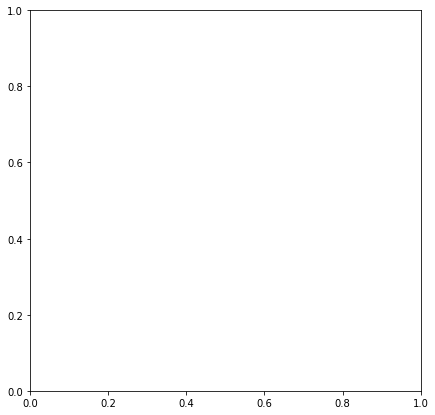

In [7]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
ax.imshow(X[120].reshape(64, 64, order='F'),interpolation='nearest',cmap=pb.cm.gray)

mlai.write_figure('olivetti-glasses-image.png', directory='./datasets')

<img class="" src="http://inverseprobability.com/talks/slides/'../slides/diagrams/datasets/olivetti-glasses-image.png" style="width:60%">

Figure: <i>Image from the Oivetti glasses data sets.</i>

Next we choose some inducing inputs. Here we’ve chosen inducing inputs
by applying k-means clustering to the training data. Think about whether
this is a good scheme for choosing the inputs? Can you devise a better
one?

In [ ]:
X.shape
y.shape
print(X)

In [ ]:
from scipy import cluster

In [ ]:
M = 8
X = (X - X.mean(0)[None,:])/X.std(0)[None,:]
Z = np.random.permutation(X)[:M]

Finally, we’re ready to build the classifier object.

In [ ]:
kern = GPy.kern.RBF(X.shape[1],lengthscale=20) + GPy.kern.White(X.shape[1],0.001)
m = GPy.models.SparseGPClassification(X, y, kernel=kern, Z=Z)
m.optimize()
print(m)

In [ ]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
ax.imshow(m.Z.gradient[0].reshape(64,64,order='F'),interpolation='nearest',cmap=pb.cm.gray)

mlai.write_figure('olivetti-inducing-variable-gradients.png', directory='./gp')

<img class="" src="http://inverseprobability.com/talks/slides/'../slides/diagrams/datasets/olivetti-inducing-variable-gradients.png" style="width:60%">

Figure: <i>The gradients of the inducing variable.</i>

Thanks!
-------

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

References
----------

Álvarez, M.A., Luengo, D., Titsias, M.K., Lawrence, N.D., 2010.
Efficient multioutput Gaussian processes through variational inducing
kernels, in:. pp. 25–32.

Bui, T.D., Yan, J., Turner, R.E., 2017. A unifying framework for
Gaussian process pseudo-point approximations using power expectation
propagation. Journal of Machine Learning Research 18, 1–72.

Csató, L., 2002. Gaussian processes — iterative sparse approximations
(PhD thesis). Aston University.

Csató, L., Opper, M., 2002. Sparse on-line Gaussian processes. Neural
Computation 14, 641–668.

Dai, Z., Damianou, A., Hensman, J., Lawrence, N.D., 2014. Gaussian
process models with parallelization and GPU acceleration.

Damianou, A., 2015. Deep Gaussian processes and variational propagation
of uncertainty (PhD thesis). University of Sheffield.

Damianou, A., Lawrence, N.D., 2013. Deep Gaussian processes, in:. pp.
207–215.

Damianou, A., Titsias, M.K., Lawrence, N.D., 2016. Variational inference
for latent variables and uncertain inputs in Gaussian processes. Journal
of Machine Learning Research 17.

Gal, Y., Wilk, M. van der, Rasmussen, C.E., n.d. Distributed variational
inference in sparse Gaussian process regression and latent variable
models, in:.

Hensman, J., Fusi, N., Lawrence, N.D., n.d. Gaussian processes for big
data, in:.

Hensman, J., Lawrence, N.D., 2014. Nested variational compression in
deep Gaussian processes. University of Sheffield.

Hensman, J., Rattray, M., Lawrence, N.D., 2012. Fast variational
inference in the conjugate exponential family, in:.

Hoffman, M., Blei, D.M., Wang, C., Paisley, J., 2012. Stochastic
variational inference, arXiv preprint arXiv:1206.7051.

King, N.J., Lawrence, N.D., n.d. Fast variational inference for Gaussian
Process models through KL-correction, in:. pp. 270–281.

Lawrence, N.D., n.d. Learning for larger datasets with the Gaussian
process latent variable model, in:. pp. 243–250.

Lawrence, N.D., Seeger, M., Herbrich, R., n.d. Fast sparse Gaussian
process methods: The informative vector machine, in:. pp. 625–632.

Lázaro-Gredilla, M., Quiñonero-Candela, J., Rasmussen, C.E., 2010.
Sparse spectrum gaussian processes. Journal of Machine Learning Research
11, 1865–1881.

Quiñonero Candela, J., Rasmussen, C.E., 2005. A unifying view of sparse
approximate Gaussian process regression. Journal of Machine Learning
Research 6, 1939–1959.

Salimbeni, H., Deisenroth, M., 2017. Doubly stochastic variational
inference for deep Gaussian processes, in: Guyon, I., Luxburg, U.V.,
Bengio, S., Wallach, H., Fergus, R., Vishwanathan, S., Garnett, R.
(Eds.), Advances in Neural Information Processing Systems 30. Curran
Associates, Inc., pp. 4591–4602.

Seeger, M.W., Hetzel, A., Dai, Z., Lawrence, N.D., 2017.
Auto-differentiating linear algebra. CoRR abs/1710.08717.

Seeger, M., Williams, C.K.I., Lawrence, N.D., n.d. Fast forward
selection to speed up sparse Gaussian process regression, in:.

Smola, A.J., Bartlett, P.L., n.d. Sparse greedy Gaussian process
regression, in:. pp. 619–625.

Snelson, E., Ghahramani, Z., n.d. Sparse Gaussian processes using
pseudo-inputs, in:.

Titsias, M.K., n.d. Variational learning of inducing variables in sparse
Gaussian processes, in:. pp. 567–574.

Williams, C.K.I., Seeger, M., n.d. Using the Nyström method to speed up
kernel machines, in:. pp. 682–688.